# Group Project
* Kadyrov Dias 23В031101
* Amangeldiyev Alikhan 23B031206
* Darmesh Aigerim 23B031080
* Kudaibergen Alikhan 22B031183

# Libraries

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report, make_scorer

### Getting dataset

* Dataset source: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Column Descriptions:

    1. id (Unique id for each patient)
    2. age (Age of the patient in years)
    3. origin (place of study)
    4. sex (Male/Female)
    5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    7. chol (serum cholesterol in mg/dl)
    8. fbs (if fasting blood sugar > 120 mg/dl)
    9. restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    10. thalach: maximum heart rate achieved
    11. exang: exercise-induced angina (True/ False)
    13. slope: the slope of the peak exercise ST segment
    14. ca: number of major vessels (0-3) colored by fluoroscopy
    15. thal: [normal; fixed defect; reversible defect]
    16. num: the predicted attribute(stage of heart disease)


In [17]:
df = pd.read_csv('heart_disease_uci.csv')
df.head(n=10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


### Defining numerical and categorical columns


In [18]:
# Define numerical and categorical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

### Analyzing dependencies of parameters with heart disease parameter(value to predict)

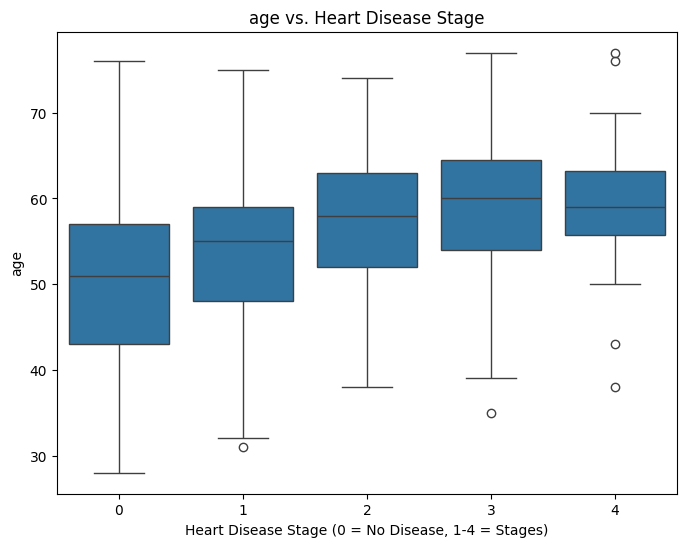

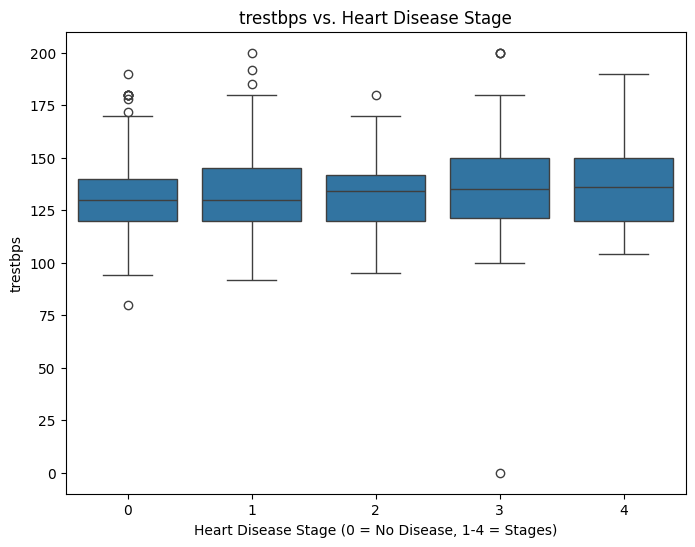

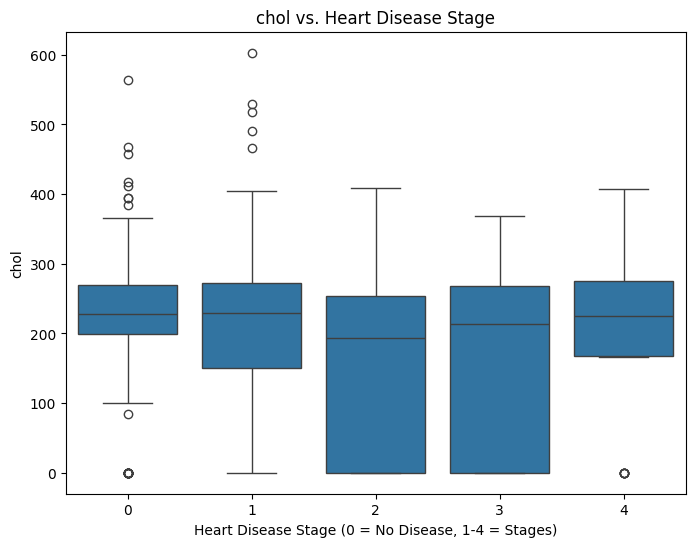

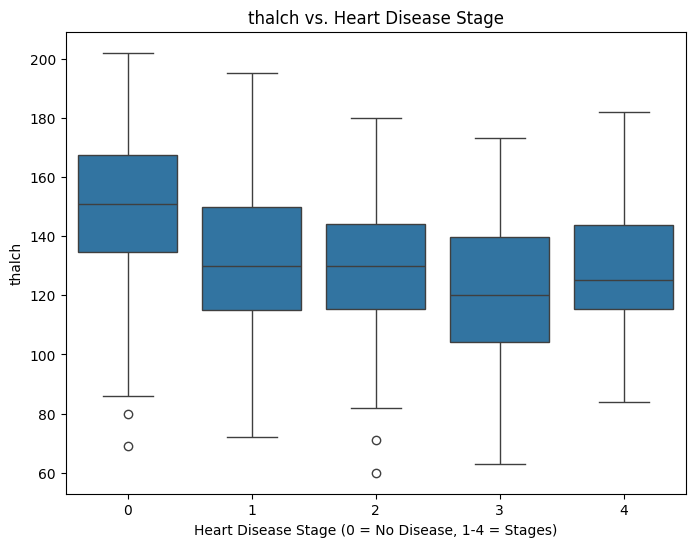

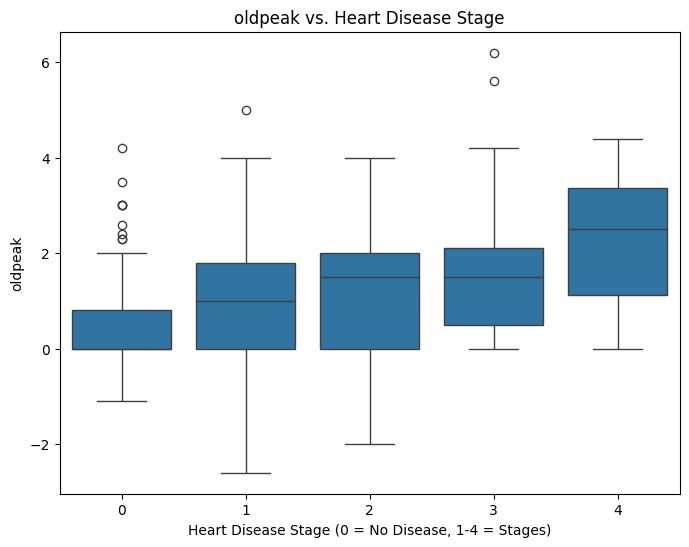

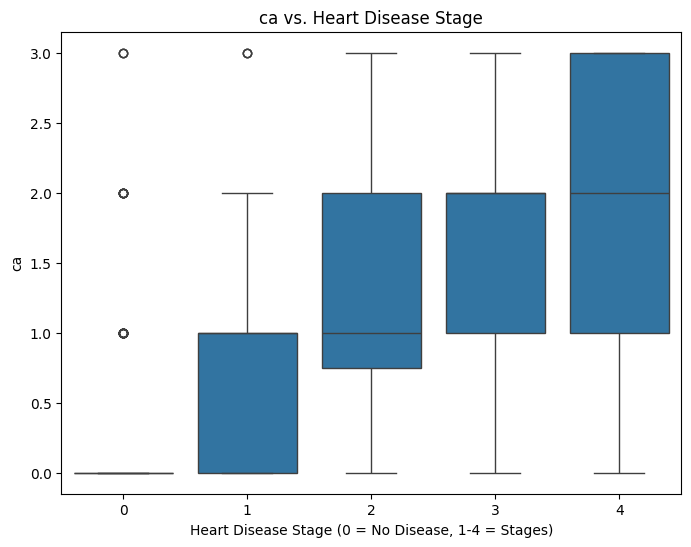

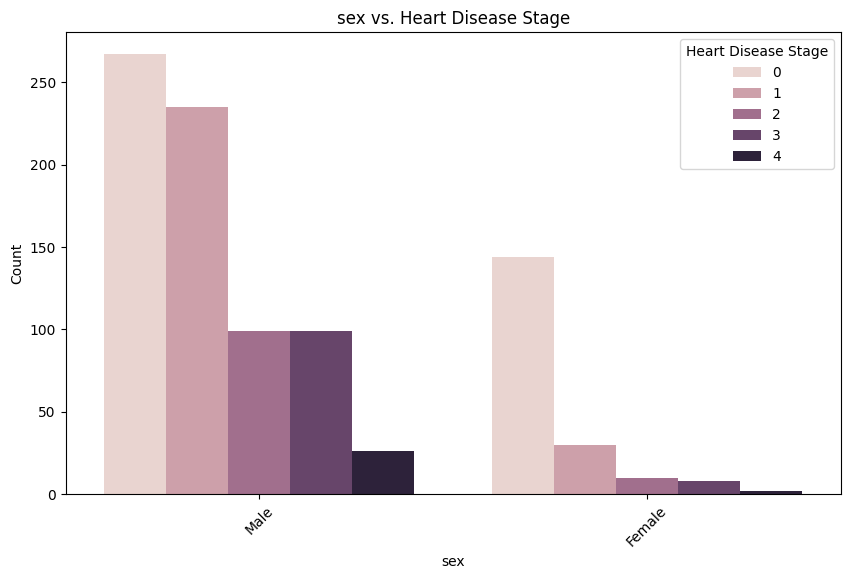

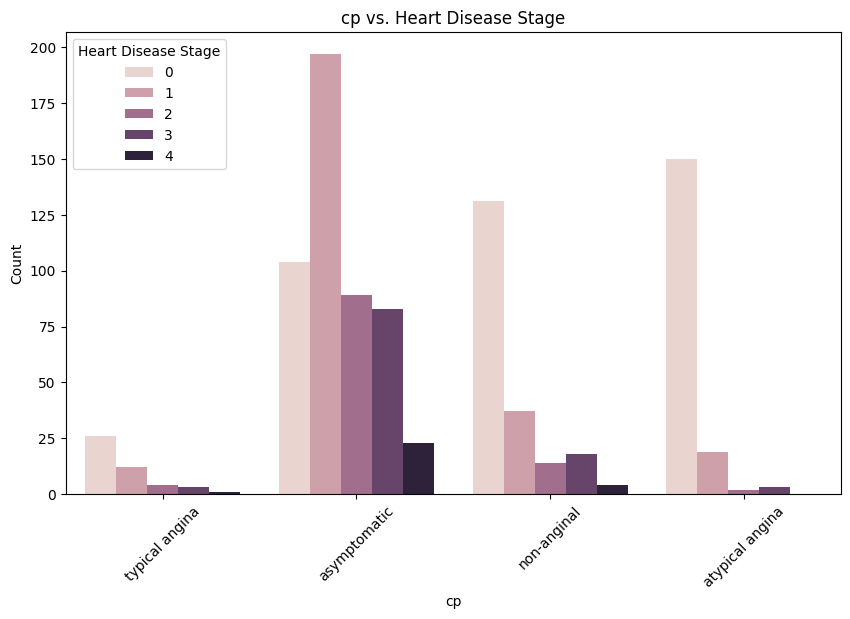

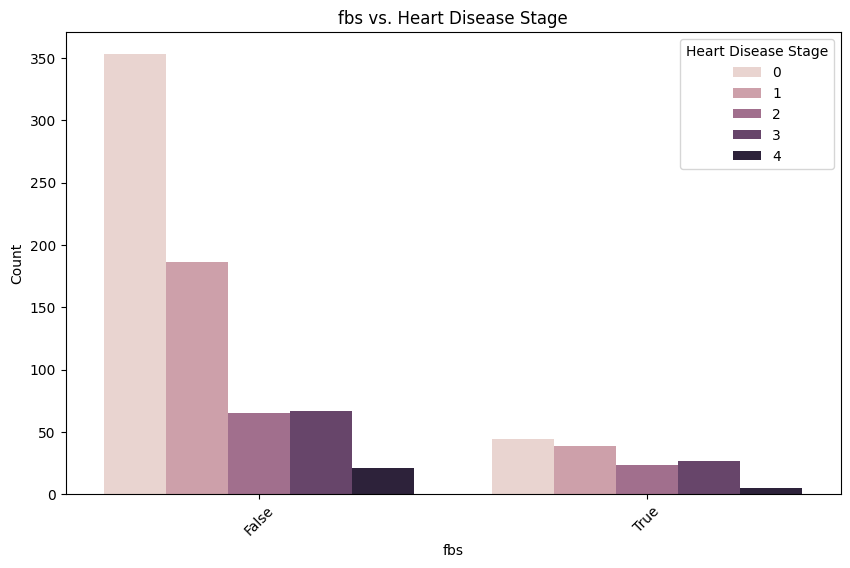

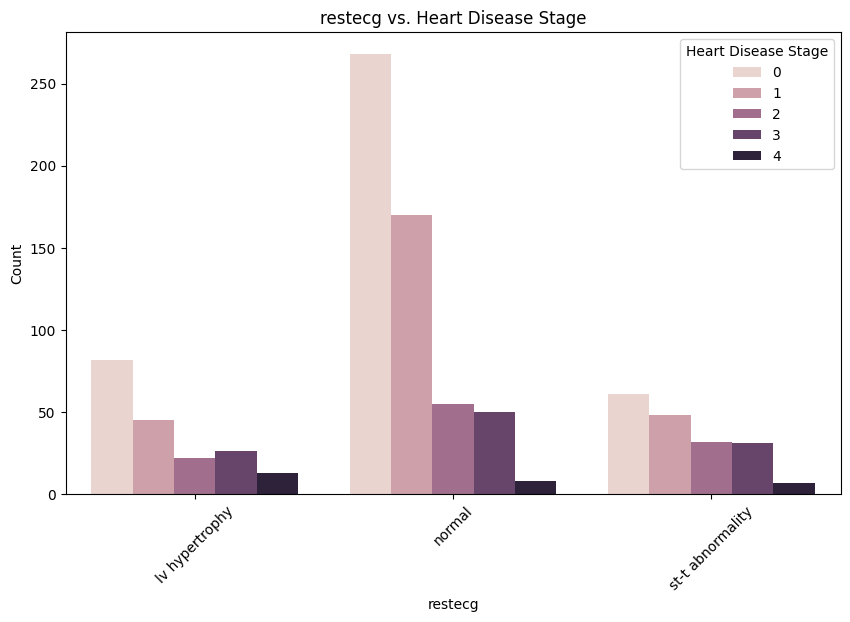

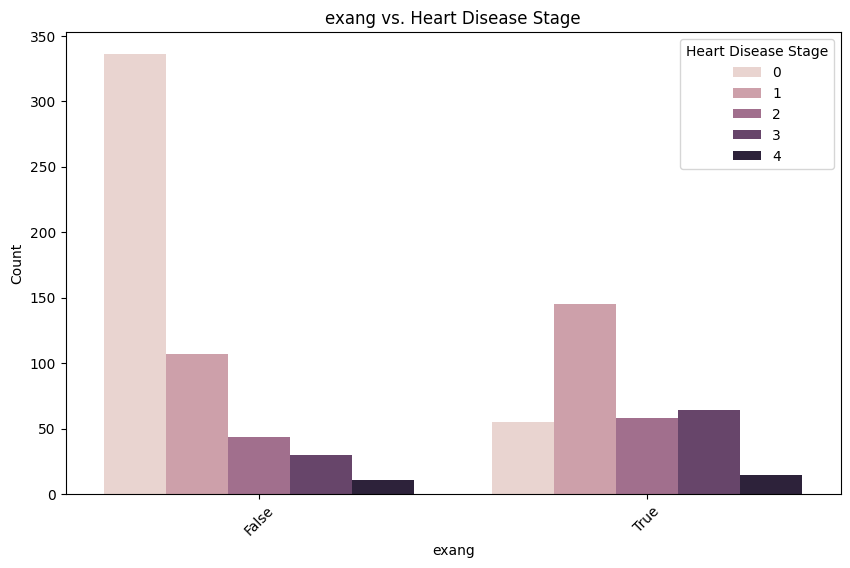

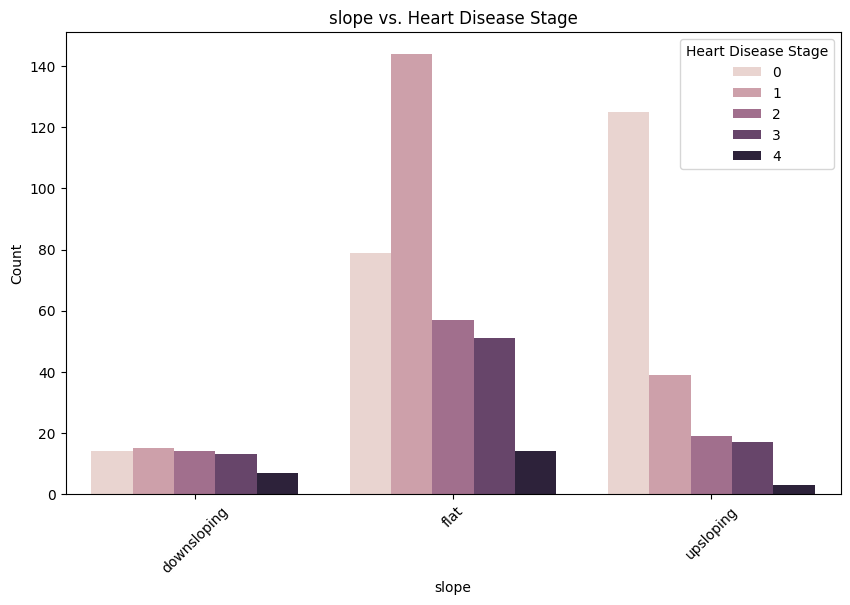

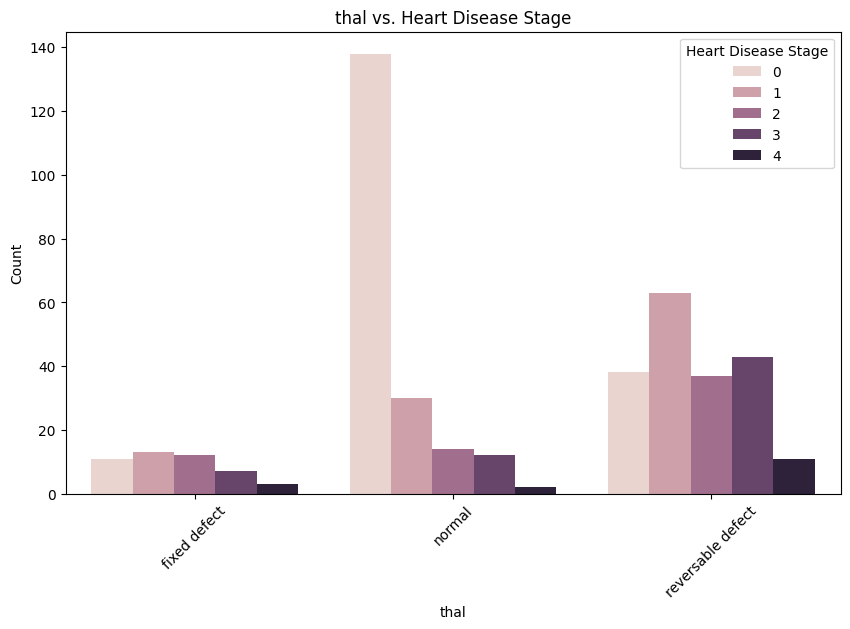

In [19]:
# Plot numerical columns with stage of disease
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='num', y=col, data=df)
    plt.title(f'{col} vs. Heart Disease Stage')
    plt.xlabel('Heart Disease Stage (0 = No Disease, 1-4 = Stages)')
    plt.ylabel(col)
    plt.show()

# Plot categorical columns with stage of disease
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'{col} vs. Heart Disease Stage')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Stage')
    plt.xticks(rotation=45)
    plt.show()

### Data preparation

* Dropping irrelevant columns
* Encode categorical columns

In [20]:
# Drop irrelevant columns
df = df.drop(['id', 'dataset'], axis=1)

# Label Encoding for binary variables
le = LabelEncoder()
binary_cols = ['sex', 'fbs', 'exang']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding
ohe_cols = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True, dtype=np.uint8)

print(df.head())


# Check for NaNs after preprocessing
print("\nNaN counts after preprocessing:")
print(df.isna().sum())

   age  sex  trestbps   chol  fbs  thalch  exang  oldpeak   ca  num  \
0   63    1     145.0  233.0    1   150.0      0      2.3  0.0    0   
1   67    1     160.0  286.0    0   108.0      1      1.5  3.0    2   
2   67    1     120.0  229.0    0   129.0      1      2.6  2.0    1   
3   37    1     130.0  250.0    0   187.0      0      3.5  0.0    0   
4   41    0     130.0  204.0    0   172.0      0      1.4  0.0    0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  1               0   
1                   0               0                  0               0   
2                   0               0                  0               0   
3                   0               1                  0               1   
4                   1               0                  0               0   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                         0           0    

* Handiling missing data
* encoding boolean to label data
* Fixing type issues(NaN)

In [21]:
# Handle missing values
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

binary_ohe_cols = ['sex', 'fbs', 'exang'] + [col for col in df.columns if col.startswith(('cp_', 'restecg_', 'slope_', 'thal_'))]
bin_imputer = SimpleImputer(strategy='most_frequent')
df[binary_ohe_cols] = bin_imputer.fit_transform(df[binary_ohe_cols])

if df['num'].isna().sum() > 0:
    target_imputer = SimpleImputer(strategy='most_frequent')
    df['num'] = target_imputer.fit_transform(df[['num']]).ravel()

# Check for NaNs after imputation
print("\nNaN counts after imputation:")
print(df.isna().sum())


NaN counts after imputation:
age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
num                         0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


* Preparing dataset for training model and testing

In [22]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

print(X.shape, y.shape)

# Perform train-test split, where 70% train, 30% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)


(920, 18) (920,)


# Model selection
### https://scikit-learn.org/stable/machine_learning_map.html


    1. LinearSVC
    2. KNeighborsClassifier
    3. VoingClassifier


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.47      0.61      0.53        80
           2       0.11      0.03      0.05        33
           3       0.41      0.22      0.29        32
           4       0.00      0.00      0.00         8

    accuracy                           0.60       276
   macro avg       0.35      0.35      0.34       276
weighted avg       0.53      0.60      0.56       276



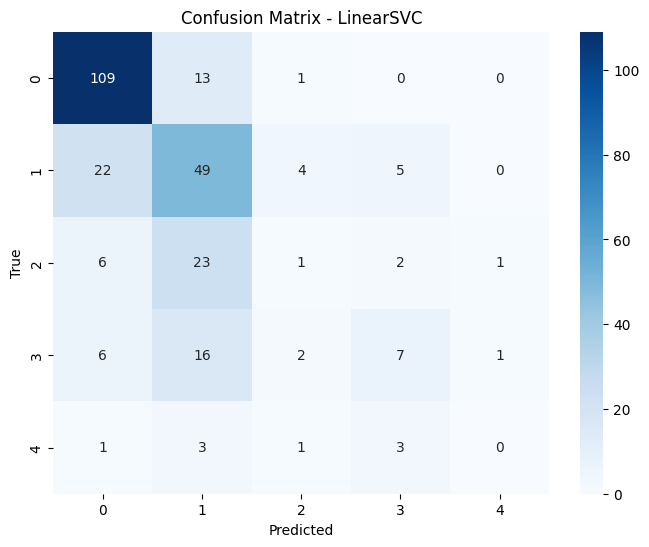

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       123
           1       0.48      0.56      0.52        80
           2       0.17      0.09      0.12        33
           3       0.29      0.06      0.10        32
           4       0.00      0.00      0.00         8

    accuracy                           0.58       276
   macro avg       0.33      0.32      0.30       276
weighted avg       0.51      0.58      0.53       276



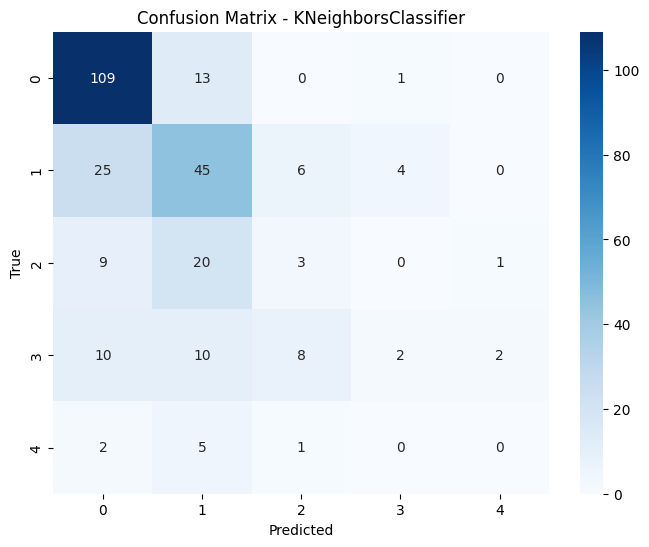

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       123
           1       0.43      0.68      0.53        80
           2       0.00      0.00      0.00        33
           3       0.40      0.06      0.11        32
           4       0.00      0.00      0.00         8

    accuracy                           0.60       276
   macro avg       0.32      0.33      0.29       276
weighted avg       0.51      0.60      0.53       276



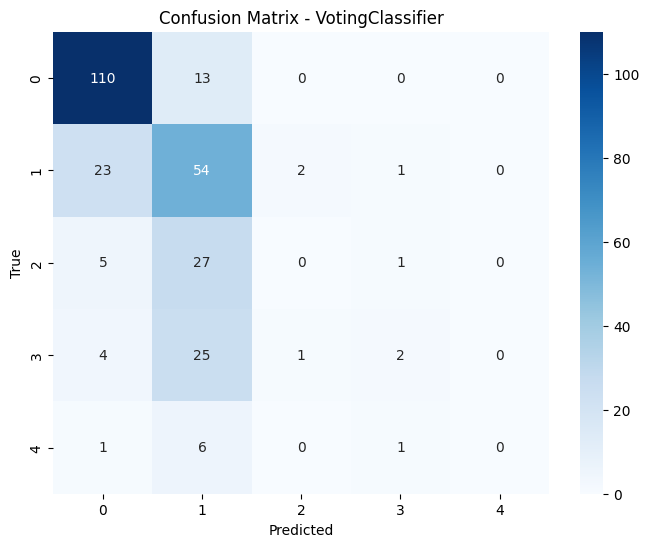

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       123
           1       0.47      0.70      0.56        80
           2       0.24      0.12      0.16        33
           3       0.36      0.12      0.19        32
           4       0.00      0.00      0.00         8

    accuracy                           0.59       276
   macro avg       0.37      0.35      0.34       276
weighted avg       0.55      0.59      0.55       276



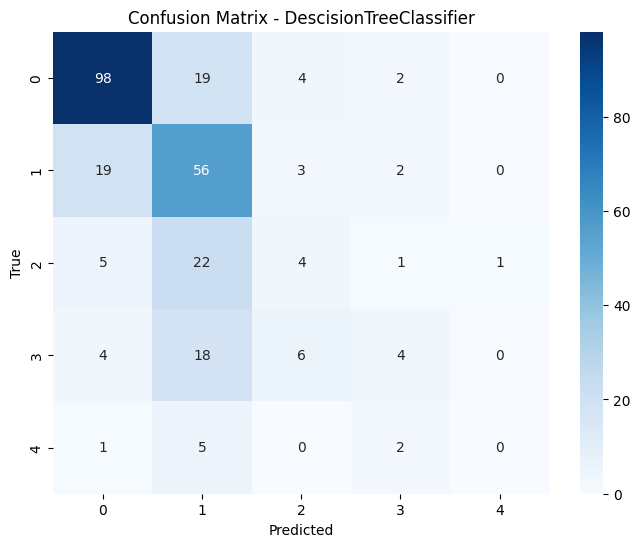


Model comparison:
--------------------
                         CV F1-score (mean)  CV F1-score (std)  F1-score  \
LinearSVC                          0.461457           0.052653  0.557065   
KNeighborsClassifier               0.376444           0.008538  0.526218   
VotingClassifier                   0.401206           0.034450  0.533823   
DescisionTreeClassifier            0.479613           0.085340  0.552411   

                         Accuracy  
LinearSVC                0.601449  
KNeighborsClassifier     0.576087  
VotingClassifier         0.601449  
DescisionTreeClassifier  0.586957  


In [23]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'LinearSVC': LinearSVC(multi_class='ovr', random_state=42, max_iter=10000),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3),
    'VotingClassifier': VotingClassifier(
        estimators=[
            ('svc_linear', SVC(kernel='linear', probability=True, random_state=42)),
            ('svc_rbf', SVC(kernel='rbf', probability=True, random_state=42))
        ],
        voting='soft'
    ),
    'DescisionTreeClassifier': DecisionTreeClassifier(max_depth=5, random_state=42),
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')                                                                                                  
    plt.show()

results = {}
for name, model in models.items():

    # CV F1-score
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Saving results
    results[name] = {
        'CV F1-score (mean)': np.mean(cv_scores),
        'CV F1-score (std)': np.std(cv_scores),
        'F1-score': f1,
        'Accuracy': accuracy
    }
    
    print(classification_report(y_test, y_pred, zero_division=0))
    
    plot_confusion_matrix(y_test, y_pred, name)

print("\nModel comparison:")
print("-"*20)
results_df = pd.DataFrame(results).T
print(results_df)

# Trying to imporve  perfomance


### Hyperparameter tuning 

* DecisionTree model and RandomForest model tuning


Best DecisionTree parameters: {'ccp_alpha': 0.01, 'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.537233527131783

Cross-validation results (DecisionTree):
Mean Accuracy: 0.537 (± 0.046)

Top 10 Feature Importances:
Feature 6: 0.496
Feature 3: 0.342
Feature 8: 0.162
Feature 16: 0.000
Feature 1: 0.000
Feature 2: 0.000
Feature 4: 0.000
Feature 5: 0.000
Feature 7: 0.000
Feature 17: 0.000

DecisionTree Test Accuracy: 0.580

Classification Report (DecisionTree):
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       123
           1       0.42      0.76      0.54        80
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         8

    accuracy                           0.58       276
   macro avg       0.24      0.31      0.26       276
weighted avg       0.46      0.58      0.51   

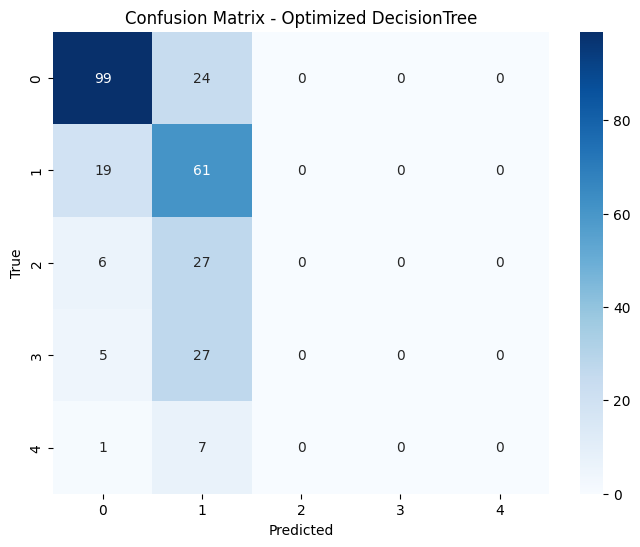


Best RandomForest parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy (RandomForest): 0.5713541666666667

RandomForest Test Accuracy: 0.580

Classification Report (RandomForest):
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       123
           1       0.41      0.68      0.51        80
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00         8

    accuracy                           0.58       276
   macro avg       0.23      0.31      0.26       276
weighted avg       0.46      0.58      0.51       276



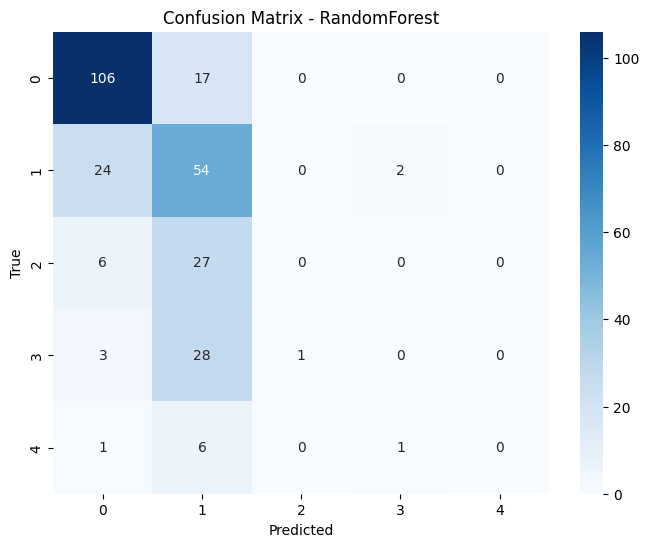

In [32]:
# Hyperparameter tuning for DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.01, 0.1] 
}
grid_search = GridSearchCV(
    dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best DecisionTree model
best_dt = grid_search.best_estimator_
print("\nBest DecisionTree parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# CV scores
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation results (DecisionTree):")
print(f"Mean Accuracy: {np.mean(cv_scores):.3f} (± {np.std(cv_scores):.3f})")

# Feature importance
feature_importances = best_dt.feature_importances_
important_features = np.argsort(feature_importances)[::-1][:10]
print("\nTop 10 Feature Importances:")
for idx in important_features:
    print(f"Feature {idx}: {feature_importances[idx]:.3f}")

# Evaluate on test set
y_pred_dt = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nDecisionTree Test Accuracy: {dt_accuracy:.3f}")
print("\nClassification Report (DecisionTree):")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# Confusion Matrix for DecisionTree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}
grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

# Best RandomForest model
best_rf = grid_search_rf.best_estimator_
print("\nBest RandomForest parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy (RandomForest):", grid_search_rf.best_score_)

# Evaluate RandomForest on test set
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandomForest Test Accuracy: {rf_accuracy:.3f}")
print("\nClassification Report (RandomForest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix for RandomForest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* LinearSVC model tuning


best parameters: {'C': 1, 'class_weight': None}
best CV F1-score: 0.5208662538401316

Cross-validation results:
Mean F1-score: 0.461 (± 0.053)
accuracy: 0.601
F1-score(weighted): 0.557
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.47      0.61      0.53        80
           2       0.11      0.03      0.05        33
           3       0.41      0.22      0.29        32
           4       0.00      0.00      0.00         8

    accuracy                           0.60       276
   macro avg       0.35      0.35      0.34       276
weighted avg       0.53      0.60      0.56       276



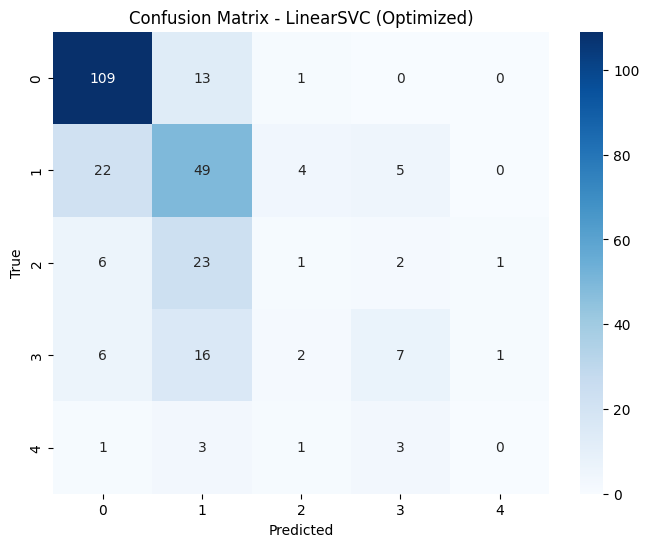

In [35]:

linearsvc = LinearSVC(multi_class='ovr', random_state=42, max_iter=10000)

# Hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}
grid_search = GridSearchCV(
    linearsvc, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# best model out of gsCV
best_model = grid_search.best_estimator_
print("\nbest parameters:", grid_search.best_params_)
print("best CV F1-score:", grid_search.best_score_)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1_weighted')
print("\nCross-validation results:")
print(f"Mean F1-score: {np.mean(cv_scores):.3f} (± {np.std(cv_scores):.3f})")

# Evaluate on test set
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)


print(f"accuracy: {accuracy:.3f}")
print(f"F1-score(weighted): {f1:.3f}")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LinearSVC (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### After tuning hyperparameter LinearSVC model demonstrated best accuracy 

# Increasing recall for LinearSVC

* Based on our goal we want to maximize recall(For medical goal its better to predict disease)

Getting the range for threshold

In [26]:
# Get decision scores for the test set
decision_scores = best_model.decision_function(X_test)

print(decision_scores)
print(f"\nMax decision score: {np.amax(decision_scores)}" )
print(f"Min decision score: {np.amin(decision_scores)}" )

[[ 0.5984151  -1.0080267  -1.02546557 -1.02132533 -1.12220657]
 [-0.53220598 -0.57204721 -0.55926146 -0.38176348 -1.04129031]
 [ 0.99972156 -0.71830758 -1.07002103 -1.13334451 -1.62519066]
 ...
 [ 0.3339141  -0.15571076 -1.22585444 -1.31832633 -0.71255273]
 [-0.53787764 -0.41599657 -0.67881012 -0.69463905 -0.78141425]
 [ 0.97404663 -0.74323797 -1.34017296 -1.3951685  -1.36271561]]

Max decision score: 1.3729256618363148
Min decision score: -1.8186591945606725


Based of threshold, maximizing the recall, by finding best threshold
* Getting true values as label > 0 (1-4), because 1-4 means that patient have heart disease


Best threshold for recall: 0.00
Recall at best threshold: 0.601
Precision at best threshold: 0.535
F1-score at best threshold: 0.557

Test set results with optimized threshold:
Accuracy: 0.601
Recall (weighted): 0.601
Precision (weighted): 0.535
F1-score (weighted): 0.557

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.47      0.61      0.53        80
           2       0.11      0.03      0.05        33
           3       0.41      0.22      0.29        32
           4       0.00      0.00      0.00         8

    accuracy                           0.60       276
   macro avg       0.35      0.35      0.34       276
weighted avg       0.53      0.60      0.56       276



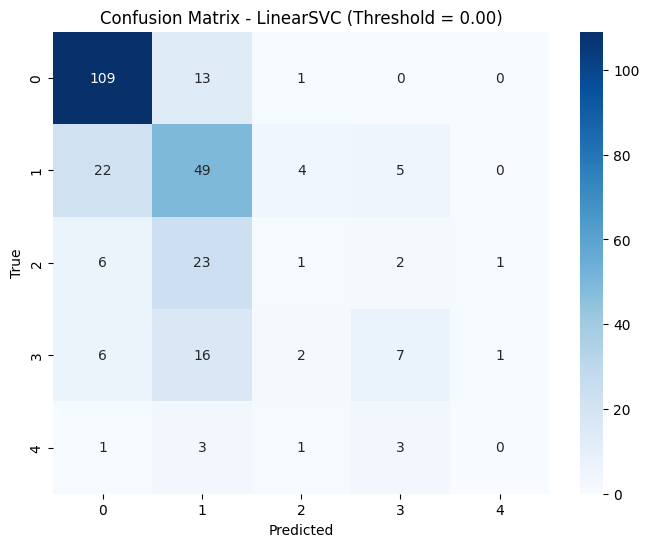

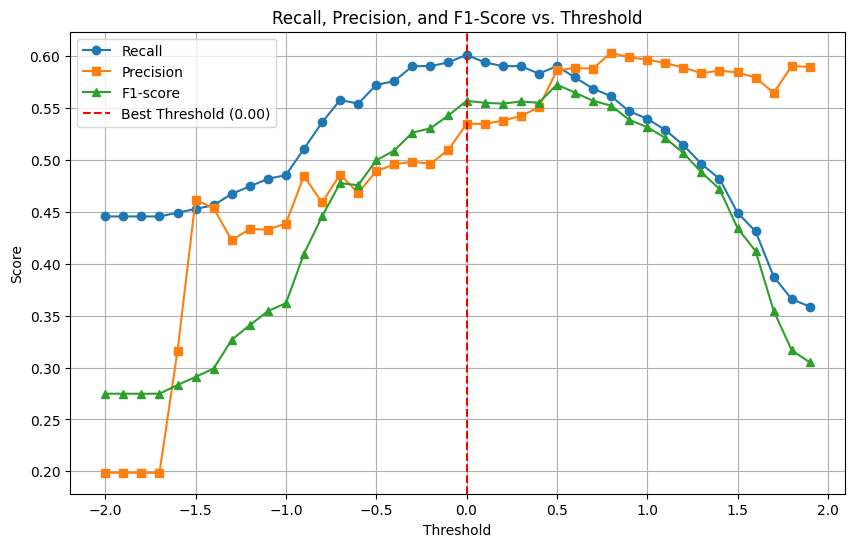

In [33]:


thresholds = np.arange(-2.0, 2.0, 0.1)
recall_scores = []
precision_scores = []
f1_scores = []

# Evaluate metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = np.zeros_like(y_test)
    for i in range(len(y_test)):
        scores = decision_scores[i]
        if np.max(scores[1:]) + threshold > scores[0]:  # getting labels 1–4
            y_pred_threshold[i] = np.argmax(scores[1:]) + 1
        else:
            y_pred_threshold[i] = 0
    
    # Compute metrics
    recall = recall_score(y_test, y_pred_threshold, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred_threshold, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, average='weighted', zero_division=0)
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Find the threshold that maximizes recall
best_recall_idx = np.argmax(recall_scores)
best_threshold = thresholds[best_recall_idx]
print(f"\nBest threshold for recall: {best_threshold:.2f}")
print(f"Recall at best threshold: {recall_scores[best_recall_idx]:.3f}")
print(f"Precision at best threshold: {precision_scores[best_recall_idx]:.3f}")
print(f"F1-score at best threshold: {f1_scores[best_recall_idx]:.3f}")

# Predict with the best threshold
y_pred_best = np.argmax(decision_scores + best_threshold, axis=1)

# Evaluate the model with the optimized threshold
print("\nTest set results with optimized threshold:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_best, average='weighted'):.3f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_best, average='weighted'):.3f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred_best, average='weighted'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - LinearSVC (Threshold = {best_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()  

# Plot recall, precision, and F1-score vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='s')
plt.plot(thresholds, f1_scores, label='F1-score', marker='^')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Recall, Precision, and F1-Score vs. Threshold')
plt.legend()
plt.grid()
plt.show()

* Best threshold for recall = 0, with accuracy = 0.6

# Conclusion


### Selected Model and Features

Model: LinearSVC with the current set of features (age, sex, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, cp after encoding).

Reason for Selection: LinearSVC is a simple, interpretable model that performs reasonably well for class 0 (precision: 0.76, recall: 0.89) and class 1 (recall: 0.61), and the threshold of 0 helps prioritize recall for heart disease cases (classes 1–4), which is critical in a medical context. The features used are comprehensive, covering demographic (age, sex), clinical (trestbps, chol), and diagnostic (oldpeak, ca, thalch, exang) aspects of heart disease.

* Limitations

    1) Poor Performance on Minority Classes (2–4): The model fails to predict classes 2 and 4 (recall: 0.00) and has low recall for class 3 (0.22). This is a critical issue in a medical context, as missing severe heart disease stages (higher classes) can lead to delayed treatment and worse outcomes.
    2) Class Imbalance: The dataset is imbalanced. The model is biased toward predicting class 0, reducing its ability to detect heart disease cases.
    3) Simplified Prediction Logic: The threshold logic (predicting the highest-scoring class among 1–4 if its score exceeds class 0’s score) oversimplifies the multi-class problem, often predicting class 1 instead of higher stages (e.g., 2, 3, 4).
    4) Feature Limitations: While the features are comprehensive, some may have noise or redundancy (e.g., chol might not be as discriminative as oldpeak). Additionally, interactions between features (e.g., age and sex) are not captured by a linear model.

### Example of best evaluated model on data

In [28]:
data = [
    [207, 58, "Male", "Cleveland", "asymptomatic", 128, 259, "FALSE", "lv hypertrophy", 130, "TRUE", 3, "flat", 2, "reversable defect", 3],
    [208, 50, "Male", "Cleveland", "asymptomatic", 144, 200, "FALSE", "lv hypertrophy", 126, "TRUE", 0.9, "flat", 0, "reversable defect", 3],
    [209, 55, "Male", "Cleveland", "atypical angina", 130, 262, "FALSE", "normal", 155, "FALSE", 0, "upsloping", 0, "normal", 0],
    [210, 62, "Female", "Cleveland", "asymptomatic", 150, 244, "FALSE", "normal", 154, "TRUE", 1.4, "flat", 0, "normal", 1],
    [211, 37, "Female", "Cleveland", "non-anginal", 120, 215, "FALSE", "normal", 170, "FALSE", 0, "upsloping", 0, "normal", 0],
    [212, 38, "Male", "Cleveland", "typical angina", 120, 231, "FALSE", "normal", 182, "TRUE", 3.8, "flat", 0, "reversable defect", 4],
    [213, 41, "Male", "Cleveland", "non-anginal", 130, 214, "FALSE", "lv hypertrophy", 168, "FALSE", 2, "flat", 0, "normal", 0],
    [214, 66, "Female", "Cleveland", "asymptomatic", 178, 228, "TRUE", "normal", 165, "TRUE", 1, "flat", 2, "reversable defect", 3],
    [215, 52, "Male", "Cleveland", "asymptomatic", 112, 230, "FALSE", "normal", 160, "FALSE", 0, "upsloping", 1, "normal", 1],
    [216, 56, "Male", "Cleveland", "typical angina", 120, 193, "FALSE", "lv hypertrophy", 162, "FALSE", 1.9, "flat", 0, "reversable defect", 0],
    [217, 46, "Female", "Cleveland", "atypical angina", 105, 204, "FALSE", "normal", 172, "FALSE", 0, "upsloping", 0, "normal", 0],
    [218, 46, "Female", "Cleveland", "asymptomatic", 138, 243, "FALSE", "lv hypertrophy", 152, "TRUE", 0, "flat", 0, "normal", 0],
    [219, 64, "Female", "Cleveland", "asymptomatic", 130, 303, "FALSE", "normal", 122, "FALSE", 2, "flat", 2, "normal", 0],
    [220, 59, "Male", "Cleveland", "asymptomatic", 138, 271, "FALSE", "lv hypertrophy", 182, "FALSE", 0, "upsloping", 0, "normal", 0],
    [221, 41, "Female", "Cleveland", "non-anginal", 112, 268, "FALSE", "lv hypertrophy", 172, "TRUE", 0, "upsloping", 0, "normal", 0],
    [222, 54, "Female", "Cleveland", "non-anginal", 108, 267, "FALSE", "lv hypertrophy", 167, "FALSE", 0, "upsloping", 0, "normal", 0],
    [223, 39, "Female", "Cleveland", "non-anginal", 94, 199, "FALSE", "normal", 179, "FALSE", 0, "upsloping", 0, "normal", 0],
    [224, 53, "Male", "Cleveland", "asymptomatic", 123, 282, "FALSE", "normal", 95, "TRUE", 2, "flat", 2, "reversable defect", 3],
    [225, 63, "Female", "Cleveland", "asymptomatic", 108, 269, "FALSE", "normal", 169, "TRUE", 1.8, "flat", 2, "normal", 1],
    [226, 34, "Female", "Cleveland", "atypical angina", 118, 210, "FALSE", "normal", 192, "FALSE", 0.7, "upsloping", 0, "normal", 0],
    [227, 47, "Male", "Cleveland", "asymptomatic", 112, 204, "FALSE", "normal", 143, "FALSE", 0.1, "upsloping", 0, "normal", 0],
    [228, 67, "Female", "Cleveland", "non-anginal", 152, 277, "FALSE", "normal", 172, "FALSE", 0, "upsloping", 1, "normal", 0],
    [229, 54, "Male", "Cleveland", "asymptomatic", 110, 206, "FALSE", "lv hypertrophy", 108, "TRUE", 0, "flat", 1, "normal", 3],
    [230, 66, "Male", "Cleveland", "asymptomatic", 112, 212, "FALSE", "lv hypertrophy", 132, "TRUE", 0.1, "upsloping", 1, "normal", 2],
    [231, 52, "Female", "Cleveland", "non-anginal", 136, 196, "FALSE", "lv hypertrophy", 169, "FALSE", 0.1, "flat", 0, "normal", 0],
    [232, 55, "Female", "Cleveland", "asymptomatic", 180, 327, "FALSE", "st-t abnormality", 117, "TRUE", 3.4, "flat", 0, "normal", 2],
    [233, 49, "Male", "Cleveland", "non-anginal", 118, 149, "FALSE", "lv hypertrophy", 126, "FALSE", 0.8, "upsloping", 3, "normal", 1],
    [234, 74, "Female", "Cleveland", "atypical angina", 120, 269, "FALSE", "lv hypertrophy", 121, "TRUE", 0.2, "upsloping", 1, "normal", 0],
    [235, 54, "Female", "Cleveland", "non-anginal", 160, 201, "FALSE", "normal", 163, "FALSE", 0, "upsloping", 1, "normal", 0],
    [236, 54, "Male", "Cleveland", "asymptomatic", 122, 286, "FALSE", "lv hypertrophy", 116, "TRUE", 3.2, "flat", 2, "normal", 3],
    [237, 56, "Male", "Cleveland", "asymptomatic", 130, 283, "TRUE", "lv hypertrophy", 103, "TRUE", 1.6, "downsloping", 0, "reversable defect", 2],
    [238, 46, "Male", "Cleveland", "asymptomatic", 120, 249, "FALSE", "lv hypertrophy", 144, "FALSE", 0.8, "upsloping", 0, "reversable defect", 1],
    [239, 49, "Female", "Cleveland", "atypical angina", 134, 271, "FALSE", "normal", 162, "FALSE", 0, "flat", 0, "normal", 0],
    [240, 42, "Male", "Cleveland", "atypical angina", 120, 295, "FALSE", "normal", 162, "FALSE", 0, "upsloping", 0, "normal", 0],
    [241, 41, "Male", "Cleveland", "atypical angina", 110, 235, "FALSE", "normal", 153, "FALSE", 0, "upsloping", 0, "normal", 0],
    [242, 41, "Female", "Cleveland", "atypical angina", 126, 306, "FALSE", "normal", 163, "FALSE", 0, "upsloping", 0, "normal", 0],
    [243, 49, "Female", "Cleveland", "asymptomatic", 130, 269, "FALSE", "normal", 163, "FALSE", 0, "upsloping", 0, "normal", 0],
    [244, 61, "Male", "Cleveland", "typical angina", 134, 234, "FALSE", "normal", 145, "FALSE", 2.6, "flat", 2, "normal", 2],
    [245, 60, "Female", "Cleveland", "non-anginal", 120, 178, "TRUE", "normal", 96, "FALSE", 0, "upsloping", 0, "normal", 0],
    [246, 67, "Male", "Cleveland", "asymptomatic", 120, 237, "FALSE", "normal", 71, "FALSE", 1, "flat", 0, "normal", 2],
    [247, 58, "Male", "Cleveland", "asymptomatic", 100, 234, "FALSE", "normal", 156, "FALSE", 0.1, "upsloping", 1, "reversable defect", 2],
    [248, 47, "Male", "Cleveland", "asymptomatic", 110, 275, "FALSE", "lv hypertrophy", 118, "TRUE", 1, "flat", 1, "normal", 1],
    [249, 52, "Male", "Cleveland", "asymptomatic", 125, 212, "FALSE", "normal", 168, "FALSE", 1, "upsloping", 2, "reversable defect", 3],
    [250, 62, "Male", "Cleveland", "atypical angina", 128, 208, "TRUE", "lv hypertrophy", 140, "FALSE", 0, "upsloping", 0, "normal", 0],
    [251, 57, "Male", "Cleveland", "asymptomatic", 110, 201, "FALSE", "normal", 126, "TRUE", 1.5, "flat", 0, "fixed defect", 0],
    [252, 58, "Male", "Cleveland", "asymptomatic", 146, 218, "FALSE", "normal", 105, "FALSE", 2, "flat", 1, "reversable defect", 1],
    [253, 64, "Male", "Cleveland", "asymptomatic", 128, 263, "FALSE", "normal", 105, "TRUE", 0.2, "flat", 1, "reversable defect", 0],
    [254, 51, "Female", "Cleveland", "non-anginal", 120, 295, "FALSE", "lv hypertrophy", 157, "FALSE", 0.6, "upsloping", 0, "normal", 0],
    [255, 43, "Male", "Cleveland", "asymptomatic", 115, 303, "FALSE", "normal", 181, "FALSE", 1.2, "flat", 0, "normal", 0],
    [256, 42, "Female", "Cleveland", "non-anginal", 120, 209, "FALSE", "normal", 173, "FALSE", 0, "flat", 0, "normal", 0],
    [257, 67, "Female", "Cleveland", "asymptomatic", 106, 223, "FALSE", "normal", 142, "FALSE", 0.3, "upsloping", 2, "normal", 0],
    [258, 76, "Female", "Cleveland", "non-anginal", 140, 197, "FALSE", "st-t abnormality", 116, "FALSE", 1.1, "flat", 0, "normal", 0],
    [259, 70, "Male", "Cleveland", "atypical angina", 156, 245, "FALSE", "lv hypertrophy", 143, "FALSE", 0, "upsloping", 0, "normal", 0],
    [260, 57, "Male", "Cleveland", "atypical angina", 124, 261, "FALSE", "normal", 141, "FALSE", 0.3, "upsloping", 0, "reversable defect", 1],
    [261, 44, "Female", "Cleveland", "non-anginal", 118, 242, "FALSE", "normal", 149, "FALSE", 0.3, "flat", 1, "normal", 0],
    [262, 58, "Female", "Cleveland", "atypical angina", 136, 319, "TRUE", "lv hypertrophy", 152, "FALSE", 0, "upsloping", 2, "normal", 3],
    [263, 60, "Female", "Cleveland", "typical angina", 150, 240, "FALSE", "normal", 171, "FALSE", 0.9, "upsloping", 0, "normal", 0],
    [264, 44, "Male", "Cleveland", "non-anginal", 120, 226, "FALSE", "normal", 169, "FALSE", 0, "upsloping", 0, "normal", 0],
    [265, 61, "Male", "Cleveland", "asymptomatic", 138, 166, "FALSE", "lv hypertrophy", 125, "TRUE", 3.6, "flat", 1, "normal", 4],
    [266, 42, "Male", "Cleveland", "asymptomatic", 136, 315, "FALSE", "normal", 125, "TRUE", 1.8, "flat", 0, "fixed defect", 2],
    [267, 52, "Male", "Cleveland", "asymptomatic", 128, 204, "TRUE", "normal", 156, "TRUE", 1, "flat", 0, "", 2],
    [268, 59, "Male", "Cleveland", "non-anginal", 126, 218, "TRUE", "normal", 134, "FALSE", 2.2, "flat", 1, "fixed defect", 2],
    [269, 40, "Male", "Cleveland", "asymptomatic", 152, 223, "FALSE", "normal", 181, "FALSE", 0, "upsloping", 0, "reversable defect", 1],
    [270, 42, "Male", "Cleveland", "non-anginal", 130, 180, "FALSE", "normal", 150, "FALSE", 0, "upsloping", 0, "normal", 0],
    [271, 61, "Male", "Cleveland", "asymptomatic", 140, 207, "FALSE", "lv hypertrophy", 138, "TRUE", 1.9, "upsloping", 1, "reversable defect", 1],
    [272, 66, "Male", "Cleveland", "asymptomatic", 160, 228, "FALSE", "lv hypertrophy", 138, "FALSE", 2.3, "upsloping", 0, "fixed defect", 0],
    [273, 46, "Male", "Cleveland", "asymptomatic", 140, 311, "FALSE", "normal", 120, "TRUE", 1.8, "flat", 2, "reversable defect", 2],
    [274, 71, "Female", "Cleveland", "asymptomatic", 112, 149, "FALSE", "normal", 125, "FALSE", 1.6, "flat", 0, "normal", 0],
    [275, 59, "Male", "Cleveland", "typical angina", 134, 204, "FALSE", "normal", 162, "FALSE", 0.8, "upsloping", 2, "normal", 1],
    [276, 64, "Male", "Cleveland", "typical angina", 170, 227, "FALSE", "lv hypertrophy", 155, "FALSE", 0.6, "flat", 0, "reversable defect", 0],
    [277, 66, "Female", "Cleveland", "non-anginal", 146, 278, "FALSE", "lv hypertrophy", 152, "FALSE", 0, "flat", 1, "normal", 0],
    [278, 39, "Female", "Cleveland", "non-anginal", 138, 220, "FALSE", "normal", 152, "FALSE", 0, "flat", 0, "normal", 0],
    [279, 57, "Male", "Cleveland", "atypical angina", 154, 232, "FALSE", "lv hypertrophy", 164, "FALSE", 0, "upsloping", 1, "normal", 1],
    [280, 58, "Female", "Cleveland", "asymptomatic", 130, 197, "FALSE", "normal", 131, "FALSE", 0.6, "flat", 0, "normal", 0],
    [281, 57, "Male", "Cleveland", "asymptomatic", 110, 335, "FALSE", "normal", 143, "TRUE", 3, "flat", 1, "reversable defect", 2],
    [282, 47, "Male", "Cleveland", "non-anginal", 130, 253, "FALSE", "normal", 179, "FALSE", 0, "upsloping", 0, "normal", 0],
    [283, 55, "Female", "Cleveland", "asymptomatic", 128, 205, "FALSE", "st-t abnormality", 130, "TRUE", 2, "flat", 1, "reversable defect", 3],
    [284, 35, "Male", "Cleveland", "atypical angina", 122, 192, "FALSE", "normal", 174, "FALSE", 0, "upsloping", 0, "normal", 0],
    [285, 61, "Male", "Cleveland", "asymptomatic", 148, 203, "FALSE", "normal", 161, "FALSE", 0, "upsloping", 1, "reversable defect", 2],
    [286, 58, "Male", "Cleveland", "asymptomatic", 114, 318, "FALSE", "st-t abnormality", 140, "FALSE", 4.4, "downsloping", 3, "fixed defect", 4],
    [287, 58, "Female", "Cleveland", "asymptomatic", 170, 225, "TRUE", "lv hypertrophy", 146, "TRUE", 2.8, "flat", 2, "fixed defect", 2],
    [288, 58, "Male", "Cleveland", "atypical angina", 125, 220, "FALSE", "normal", 144, "FALSE", 0.4, "flat", "", "reversable defect", 0],
    [289, 56, "Male", "Cleveland", "atypical angina", 130, 221, "FALSE", "lv hypertrophy", 163, "FALSE", 0, "upsloping", 0, "reversable defect", 0],
    [290, 56, "Male", "Cleveland", "atypical angina", 120, 240, "FALSE", "normal", 169, "FALSE", 0, "downsloping", 0, "normal", 0],
    [291, 67, "Male", "Cleveland", "non-anginal", 152, 212, "FALSE", "lv hypertrophy", 150, "FALSE", 0.8, "flat", 0, "reversable defect", 1],
    [292, 55, "Female", "Cleveland", "atypical angina", 132, 342, "FALSE", "normal", 166, "FALSE", 1.2, "upsloping", 0, "normal", 0],
    [293, 44, "Male", "Cleveland", "asymptomatic", 120, 169, "FALSE", "normal", 144, "TRUE", 2.8, "downsloping", 0, "fixed defect", 2],
    [294, 63, "Male", "Cleveland", "asymptomatic", 140, 187, "FALSE", "lv hypertrophy", 144, "TRUE", 4, "upsloping", 2, "reversable defect", 2],
    [295, 63, "Female", "Cleveland", "asymptomatic", 124, 197, "FALSE", "normal", 136, "TRUE", 0, "flat", 0, "normal", 1],
    [296, 41, "Male", "Cleveland", "atypical angina", 120, 157, "FALSE", "normal", 182, "FALSE", 0, "upsloping", 0, "normal", 0]
]

columns = ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.DataFrame(data, columns=columns)

df.replace('', np.nan, inplace=True)

df = df.drop(['id', 'dataset'], axis=1)

le = LabelEncoder()
binary_cols = ['sex', 'fbs', 'exang']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

ohe_cols = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True, dtype=np.uint8)

print("DataFrame after encoding:")
print(df.head())

print("\nNaN counts after preprocessing:")
print(df.isna().sum())

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

binary_ohe_cols = ['sex', 'fbs', 'exang'] + [col for col in df.columns if col.startswith(('cp_', 'restecg_', 'slope_', 'thal_'))]
bin_imputer = SimpleImputer(strategy='most_frequent')
df[binary_ohe_cols] = bin_imputer.fit_transform(df[binary_ohe_cols])

if df['num'].isna().sum() > 0:
    target_imputer = SimpleImputer(strategy='most_frequent')
    df['num'] = target_imputer.fit_transform(df[['num']]).ravel()

print("\nNaN counts after imputation:")
print(df.isna().sum())

X_new = df.drop('num', axis=1)
y_true = df['num']


scaler = StandardScaler()
scaler.fit(X_new) 
X_new_scaled = scaler.transform(X_new)




DataFrame after encoding:
   age  sex  trestbps  chol  fbs  thalch  exang  oldpeak   ca  num  \
0   58    1       128   259    0     130      1      3.0  2.0    3   
1   50    1       144   200    0     126      1      0.9  0.0    3   
2   55    1       130   262    0     155      0      0.0  0.0    0   
3   62    0       150   244    0     154      1      1.4  0.0    1   
4   37    0       120   215    0     170      0      0.0  0.0    0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0                   0               0                  0               0   
1                   0               0                  0               0   
2                   1               0                  0               1   
3                   0               0                  0               1   
4                   0               1                  0               1   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0                      

/var/folders/99/9289r4dd4t9c6lkyfghfzq5w0000gn/T/ipykernel_18628/512419615.py:98: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('', np.nan, inplace=True)


* Representing predicting of best evaluated model


Predictions with Best Threshold for Recall (Threshold = 0):
    True Label  Predicted Label
0            3                1
1            3                1
2            0                0
3            1                1
4            0                0
5            4                1
6            0                0
7            3                1
8            1                0
9            0                1
10           0                0
11           0                1
12           0                1
13           0                0
14           0                0
15           0                0
16           0                0
17           3                1
18           1                1
19           0                0
20           0                0
21           0                0
22           3                1
23           2                1
24           0                0
25           2                2
26           1                3
27           0                0
28         

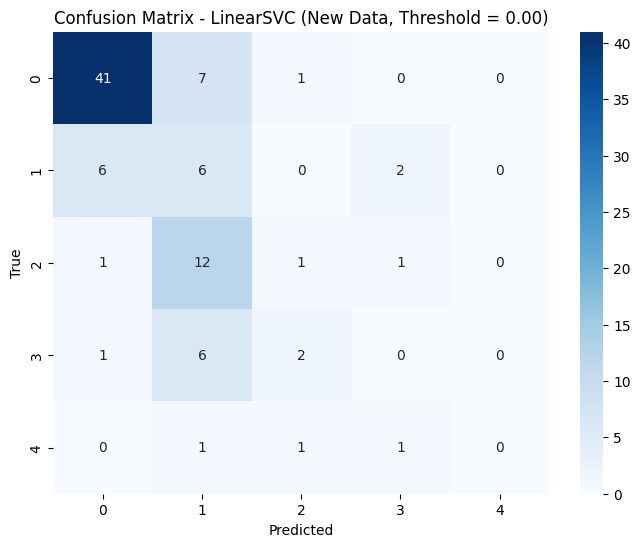

In [29]:
decision_scores_new = best_model.decision_function(X_new_scaled)

best_threshold = 0
y_pred_new = np.zeros_like(y_true)
for i in range(len(y_true)):
    scores = decision_scores_new[i]
    if np.max(scores[1:]) + best_threshold > scores[0]:  # Prioritize classes 1–4
        y_pred_new[i] = np.argmax(scores[1:]) + 1
    else:
        y_pred_new[i] = 0
        
correct = np.logical_or(y_test == y_pred, (y_test > 0) & (y_pred > 0))
custom_accuracy = np.mean(correct)


results = pd.DataFrame({
    'True Label': y_true,
    'Predicted Label': y_pred_new
})

print("\nPredictions with Best Threshold for Recall (Threshold = 0):")
print(results.head(40))

new_accuracy = accuracy_score(y_true, y_pred_new)
print(f"\nAccuracy on new data: {new_accuracy:.3f}")
print(f"Custom Accuracy (y_true == y_pred or (y_true > 0 and y_pred > 0)): {custom_accuracy:.3f}")



print("\nClassification Report on New Data:")
print(classification_report(y_true, y_pred_new, zero_division=0))

cm_new = confusion_matrix(y_true, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - LinearSVC (New Data, Threshold = {best_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
feature_names = X_new.columns

# Compute average absolute coefficients across all classes
coef_abs_mean = np.mean(np.abs(best_model.coef_), axis=0)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coef_abs_mean
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top 10):")
print(feature_importance.head(18))

Feature Importance (Top 10):
                     Feature  Importance
9         cp_atypical angina    0.144967
16               thal_normal    0.096495
7                    oldpeak    0.089678
8                         ca    0.089453
17    thal_reversable defect    0.088643
14                slope_flat    0.088276
10            cp_non-anginal    0.079981
6                      exang    0.077514
3                       chol    0.075206
4                        fbs    0.071225
13  restecg_st-t abnormality    0.068392
1                        sex    0.066855
12            restecg_normal    0.051074
5                     thalch    0.044574
0                        age    0.043686
2                   trestbps    0.036638
15           slope_upsloping    0.035308
11         cp_typical angina    0.030193


* Improvements

    1) Address Class Imbalance:
        Use oversampling techniques like SMOTE to generate synthetic samples for minority classes (2–4) during training.
        Apply class weights in the LinearSVC model to penalize misclassification of minority classes more heavily.
    2) Use a More Complex Model:
        Switch to a non-linear model like Random Forest or Gradient Boosting (e.g., XGBoost), which can capture feature interactions and better handle multi-class problems.
        These models can also provide feature importance scores (e.g., Gini importance in Random Forest) to refine feature selection.
    3) Get bigger dataset: 
        Dataset for this model was trained based on dataset with 980 samples, that doesn't allow us to use more complex model(e.g. SGD Classifier, Kernel approximation)

### Medical Context:
 * In a medical setting, the model’s high recall for class 0 is beneficial for ruling out heart disease in healthy patients, reducing unnecessary interventions. However, its inability to reliably detect stages 2–4 makes it inadequate for clinical use as a standalone tool. The focus on maximizing recall for classes 1–4 aligns with the medical priority of minimizing false negatives, but the model’s bias toward class 0 due to class imbalance (24 samples for class 0 vs. fewer for classes 1–4) and its simplified prediction logic limit its effectiveness. Features like oldpeak, ca, thalch, and exang were identified as key contributors to the model’s predictions, highlighting their importance in diagnosing heart disease, while features like chol and trestbps appeared less discriminative.

### Completed Work:
* The work on this model involved thorough data preprocessing, including label encoding for binary variables (sex, fbs, exang), one-hot encoding for categorical variables (cp, restecg, slope, thal), and imputation for missing values. Feature scaling and alignment with the training data ensured consistency, and the model was evaluated using a comprehensive set of metrics (accuracy, precision, recall, F1-score) alongside a confusion matrix. Feature importance analysis revealed the physiological relevance of diagnostic features, and the evaluation process highlighted the impact of class imbalance on model performance. Recommendations for improvement include adopting a Random Forest model with SMOTE to address class imbalance, incorporating feature interactions, and using class-specific thresholds to better distinguish between stages 1–4.